# Analysing the graph and our algorithm on the graph with a small network


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
import imageio
import datetime
from sklearn.model_selection import train_test_split

In [ ]:
pd.read_parquet("yellow_tripdata_2022-01.parquet").to_csv("Yellow_January.csv")

In [ ]:
df = pd.read_csv("Yellow_January.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [ ]:
p = df['PULocationID']
d = df['DOLocationID']

In [ ]:
p1 = []
d1 = []
for i in range(len(p)):
  if p[i] not in p1:
    p1.append(p[i])
    d1.append(d[i])

https://www1.nyc.gov/assets/tlc/images/content/pages/about/taxi_zone_map_brooklyn.jpg

In [ ]:
e = []
for i in p1:
  l = []
  for j in range(len(df['PULocationID'])):
    if  not np.isnan(df['PULocationID'][j]) and not np.isnan(df['passenger_count'][j]) and df['PULocationID'][j]==i:
      print(df['PULocationID'][j],df['passenger_count'][j])
      l.append(int(df['passenger_count'][j]))
  print(l)
  e.append([i,l])

Streaming output truncated to the last 5000 lines.
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 3.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 2.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 0.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 2.0
215 1.0
215 2.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 2.0
215 2.0
215 1.0
215 3.0
215 2.0
215 1.0
215 1.0
215 1.0
215 1.0
215 2.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 2.0
215 1.0
215 2.0
215 1.0
215 6.0
215 1.0
215 1.0
215 1.0
215 1.0
215 2.0
215 2.0
215 1.0
215 2.0
215 1.0
215 1.0
215 2.0
215 2.0
215 1.0
215 1.0
215 3.0
215 1.0
215 2.0
215 1.0
215 2.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 2.0
215 2.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 2.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 1.0
215 2.0
215 1.0
215 1.0
215 2.0
215 1

In [ ]:
print(e[0])
l=[]
for i in e:
  if len(i[1])!=0:
    l.append([i[0],sum(i[1])/len(i[1])])
print(l)

[142, [2, 1, 1, 1, 2, 1, 4, 2, 1, 1, 1, 0, 2, 2, 1, 1, 6, 1, 1, 3, 1, 1, 1, 2, 2, 3, 3, 3, 1, 1, 3, 2, 4, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 2, 1, 1, 2, 4, 1, 1, 1, 1, 3, 1, 1, 1, 2, 5, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 5, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 6, 1, 3, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 5, 1, 1, 1, 2, 3, 1, 2, 2, 2, 1, 2, 1, 1, 3, 1, 3, 1, 1, 2, 3, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 3, 3, 1, 1, 2, 1, 2, 1, 4, 1, 2, 1, 1, 1, 6, 3, 2, 1, 4, 3, 3, 1, 2, 4, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 3, 3, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 3, 2, 1, 2, 1, 3, 3, 3, 1, 1, 2, 1, 2, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 2, 1, 1, 1, 1, 4, 2, 5, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 3, 3, 2, 4, 

In [ ]:
ex_df = pd.DataFrame(l, columns =['Location', 'Expected_Number'])
print(ex_df)
ex_df.to_csv('Expected_passengers.csv')

     Location  Expected_Number
0         142         1.395327
1         236         1.374200
2         166         1.346480
3         114         1.440475
4          68         1.400158
..        ...              ...
251       118         2.000000
252       105         1.000000
253       109         1.000000
254       176         1.000000
255       115         1.000000

[256 rows x 2 columns]


# Using Pre-computed Expected Number of Passengers

In [ ]:
data = pd.read_csv('Expected_passengers_brooklyn.csv')
data

,Unnamed: 0,Location,Expected_Number
0,0,11,1.000000
1,1,14,1.102941
2,2,17,1.234450
3,3,21,1.065574
4,4,22,1.042254
...,...,...,...
56,56,227,1.129032
57,57,228,1.231579
58,58,255,1.432796
59,59,256,1.516704


In [ ]:
d = {}
for i in range(len(data)):
  d[data['Location'][i]]=data['Expected_Number'][i]
  print("Expected number of passengers at location "+str(data['Location'][i])+" is "+str(data['Expected_Number'][i]))

Expected number of passengers at location 11 is 1.0
Expected number of passengers at location 14 is 1.1029411764705883
Expected number of passengers at location 17 is 1.2344497607655502
Expected number of passengers at location 21 is 1.0655737704918034
Expected number of passengers at location 22 is 1.0422535211267605
Expected number of passengers at location 25 is 1.2970903522205206
Expected number of passengers at location 26 is 1.1195652173913044
Expected number of passengers at location 29 is 1.0819672131147542
Expected number of passengers at location 33 is 1.3137003841229191
Expected number of passengers at location 34 is 1.105263157894737
Expected number of passengers at location 35 is 1.0454545454545454
Expected number of passengers at location 36 is 1.265625
Expected number of passengers at location 37 is 1.146067415730337
Expected number of passengers at location 39 is 1.0822784810126582
Expected number of passengers at location 40 is 1.2527075812274369
Expected number of pas

In [ ]:
edgelist = [
            [178,165],
            [178,21],
            [178,22],
            [178,26],
            [178,89],
            [165,91],
            [165,149],
            [165,155],
            [178,123],
            [165,123],
            [89,26],
            [89,133],
            [89,85],
            [89,71],
            [89,190],
            [89,257],
            [149,210],
            [33,65],
            [33,52],
            [33,54],
            [33,66],
            [66,34],
            [65,97],
            [65,25],
            [97,25],
            [54,195],
            [52,40],
            [25,40],
            [25,106],
            [25,97],
            [65,97],
            [34,97],
            [34,49],
            [34,217],
            [25,181],
            [97,181],
            [97,189],
            [97,49],
            [97,189],
            [49,189],
            [181,228],
            [181,257],
            [181,190],
            [189,181],
            [189,190],
            [190,257],
            [190,62],
            [190,188],
            [190,89],
            [89,133],
            [89,85],
            [257,111],
            [257,228],
            [257,133],
            [111,227],
            [111,26],
            [111,133]
]
current = []
for i in edgelist:
  if i[0] not in current:
    current.append(i[0])
  if i[1] not in current:
    current.append(i[1])
print(current)

[178, 165, 21, 22, 26, 89, 91, 149, 155, 123, 133, 85, 71, 190, 257, 210, 33, 65, 52, 54, 66, 34, 97, 25, 195, 40, 106, 49, 217, 181, 189, 228, 62, 188, 111, 227]


In [ ]:
g = nx.Graph()
for i in current:
  g.add_node(i,weight=d[i])
for i in edgelist:
  g.add_edge(i[0],i[1])
  g.add_edge(i[1],i[0])

{178: 1.1428571428571428, 165: 1.197674418604651, 21: 1.0655737704918034, 22: 1.0422535211267605, 26: 1.1195652173913044, 89: 1.074766355140187, 91: 1.0342465753424657, 149: 1.0, 155: 1.0467289719626167, 123: 1.137931034482759, 133: 1.294871794871795, 85: 1.037037037037037, 71: 1.1237113402061856, 190: 1.4736842105263157, 257: 1.255813953488372, 210: 1.0091743119266054, 33: 1.3137003841229191, 65: 1.3675819309123118, 52: 1.2586206896551724, 54: 1.3333333333333333, 66: 1.5765472312703583, 34: 1.105263157894737, 97: 1.3289256198347108, 25: 1.2970903522205206, 195: 1.3170731707317074, 40: 1.2527075812274369, 106: 1.3636363636363635, 49: 1.2345132743362832, 217: 1.273972602739726, 181: 1.3059701492537314, 189: 1.3404255319148937, 228: 1.231578947368421, 62: 1.0480769230769231, 188: 1.1688311688311688, 111: 1.0, 227: 1.1290322580645162}


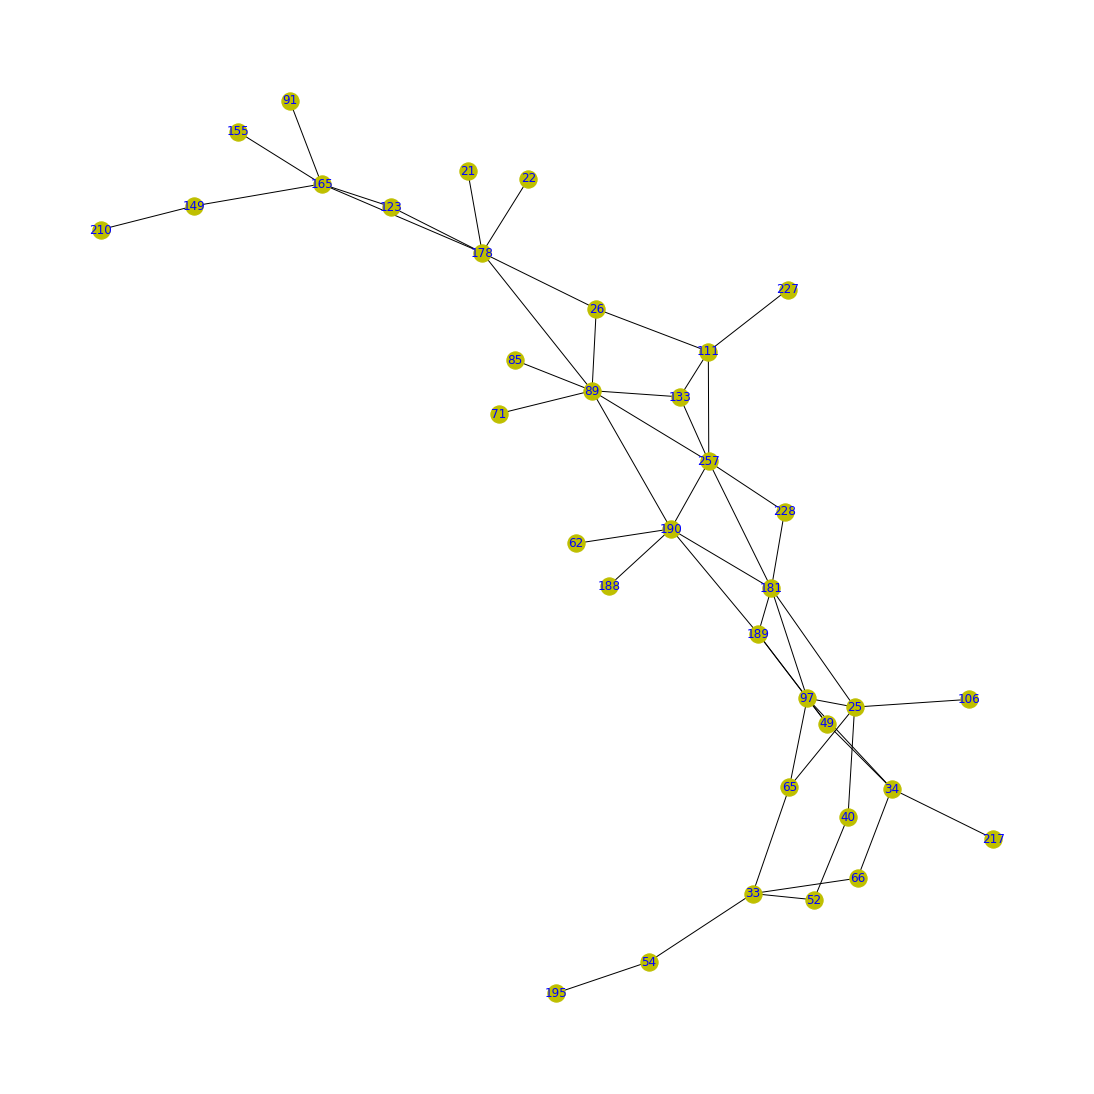

In [ ]:
pos = nx.spring_layout(g)
labels = {n: g.nodes[n]['weight'] for n in g.nodes}
print(labels)
plt.figure(figsize=(15,15))
nx.draw(g,node_color='y',with_labels = True,font_color='b')

In [ ]:
def get_weight_sum(p):
  w1 = 0
  for i in p:
    w1+=d[i]
  return w1
def get_weight_max(p):
  w1 = 1
  for i in p:
    w1*=d[i]
  return w1
def heaviest_path1(g,s,t):
  p = []
  w = 0
  for path in nx.all_simple_paths(g, s, t):
    if w<get_weight_sum(path):
      w = get_weight_sum(path)
      p = path
  return p,w
def heaviest_path2(g,s,t):
  p = []
  w = 0
  for path in nx.all_simple_paths(g, s, t):
    if w<get_weight_max(path):
      w = get_weight_max(path)
      p = path
  return p,w
def get_optimal_path(g,s,t):
  p = []
  w = d[s]
  p.append(s)
  nodes = nx.node_connected_component(g, s)
  we = []
  while(True):
    nodes = nx.node_connected_component(g, s)
    print(nodes)
    m=0
    for i in nodes:
      if nx.has_path(g,i,t) and i not in p:
        if m<d[i]:
          m=d[i]
          s=i
    w+=d[i]
    p.append(s)
    print(p,w)
    if(s==t):
      break
  return p,w

In [ ]:
s = 89
t = 33
path1 = nx.shortest_path(g,source=s,target=t,weight='weight')
path2 = nx.shortest_path(g,source=s,target=t)
print(path1)
print(path2)
w1 = 0
w2 = 0
w3 = 1
for i in path1:
  w1+=d[i]
for i in path2:
  w2+=d[i]
  w3*=d[i]
print("Expected Number of Passengers using minimum of weight as metric = "+str(w1))
print("Expected Number of Passengers without weight as metric = "+str(w2))
print("Percentage increase = "+str((w1-w2)/w2*100))
h_p1,weight1 = heaviest_path1(g,s,t)
h_p2,weight2 = heaviest_path2(g,s,t)
print(h_p1,weight1)
print("Expected Number of Passengers using maximum of weight as metric = "+str(weight1))
print("Expected Number of Passengers without weight as metric = "+str(w2))
print("Percentage increase = "+str((weight1-w2)/weight1*100))
print(h_p2,weight2)
print("Expected Number of Passengers using maximum of weight as metric = "+str(weight2))
print("Expected Number of Passengers without weight as metric = "+str(w3))
print("Percentage increase = "+str((weight2-w3)/weight2*100))

[89, 190, 181, 97, 65, 33]
[89, 257, 181, 97, 65, 33]
Expected Number of Passengers using minimum of weight as metric = 7.864628649790176
Expected Number of Passengers without weight as metric = 7.646758392752233
Percentage increase = 2.849184528236771
[89, 178, 26, 111, 133, 257, 228, 181, 190, 189, 49, 34, 97, 65, 25, 40, 52, 33] 22.39793629301625
Expected Number of Passengers using maximum of weight as metric = 22.39793629301625
Expected Number of Passengers without weight as metric = 7.646758392752233
Percentage increase = 65.8595403937437
[89, 178, 26, 111, 133, 257, 228, 181, 190, 189, 49, 34, 97, 65, 25, 40, 52, 33] 47.3343835283788
Expected Number of Passengers using maximum of weight as metric = 47.3343835283788
Expected Number of Passengers without weight as metric = 4.20845775760106
Percentage increase = 91.10908932599085


In [ ]:
op,ow = get_optimal_path(g,s,t)
print(op,ow)

{257, 133, 21, 22, 149, 25, 26, 155, 33, 34, 165, 40, 49, 178, 52, 181, 54, 188, 189, 62, 190, 65, 66, 195, 71, 210, 85, 89, 217, 91, 97, 227, 228, 106, 111, 123}
[89, 66] 2.212697389622946
{257, 133, 21, 22, 149, 25, 26, 155, 33, 34, 165, 40, 49, 178, 52, 181, 54, 188, 189, 190, 62, 65, 66, 195, 71, 210, 85, 217, 89, 91, 97, 227, 228, 106, 111, 123}
[89, 66, 190] 3.3506284241057047
{257, 133, 21, 22, 149, 25, 26, 155, 33, 34, 165, 40, 49, 178, 52, 181, 54, 188, 189, 62, 190, 65, 66, 195, 71, 210, 85, 89, 217, 91, 97, 227, 228, 106, 111, 123}
[89, 66, 190, 65] 4.488559458588464
{257, 133, 21, 22, 149, 25, 26, 155, 33, 34, 165, 40, 49, 178, 52, 181, 54, 188, 189, 190, 62, 65, 66, 195, 71, 210, 85, 217, 89, 91, 97, 227, 228, 106, 111, 123}
[89, 66, 190, 65, 106] 5.6264904930712225
{257, 133, 21, 22, 149, 25, 26, 155, 33, 34, 165, 40, 49, 178, 52, 181, 54, 188, 189, 62, 190, 65, 66, 195, 71, 210, 85, 89, 217, 91, 97, 227, 228, 106, 111, 123}
[89, 66, 190, 65, 106, 189] 6.764421527553981
{

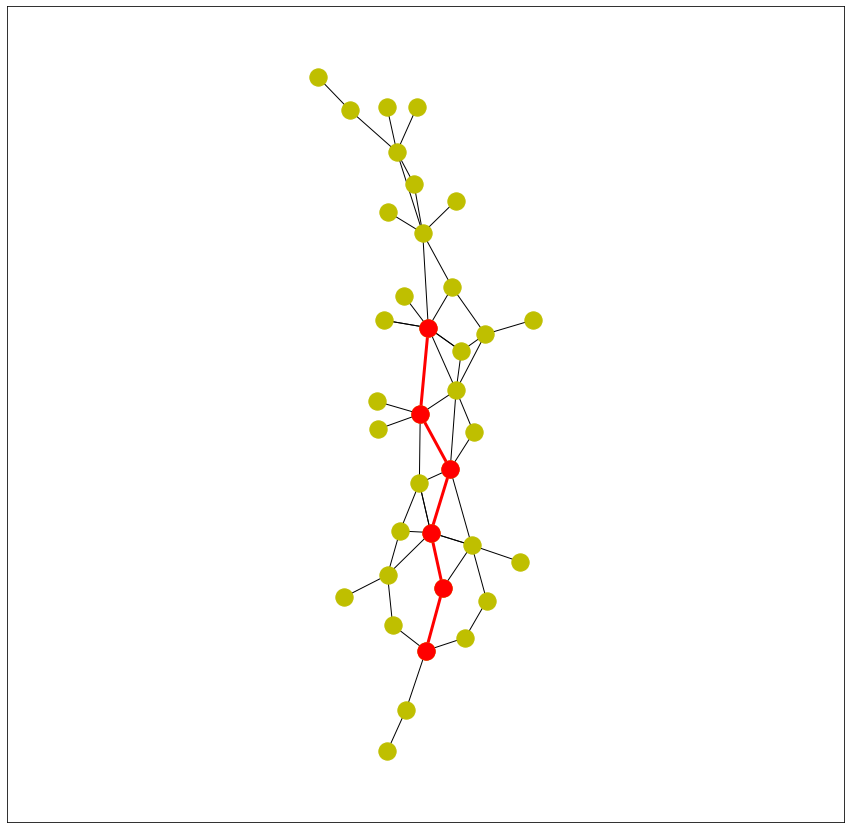

In [ ]:
plt.figure(figsize=(15,15))
g = nx.Graph()
for i in edgelist:
  g.add_edge(i[0],i[1])
nx.draw_networkx_nodes(g,pos,nodelist=current,node_color='y')
nx.draw_networkx_edges(g,pos,edgelist=edgelist)
path_edges1 = list(zip(path1,path1[1:]))
nx.draw_networkx_nodes(g,pos,nodelist=path1,node_color='r')
nx.draw_networkx_edges(g,pos,edgelist=path_edges1,edge_color='r',width=3)
plt.axis('equal')
plt.show()

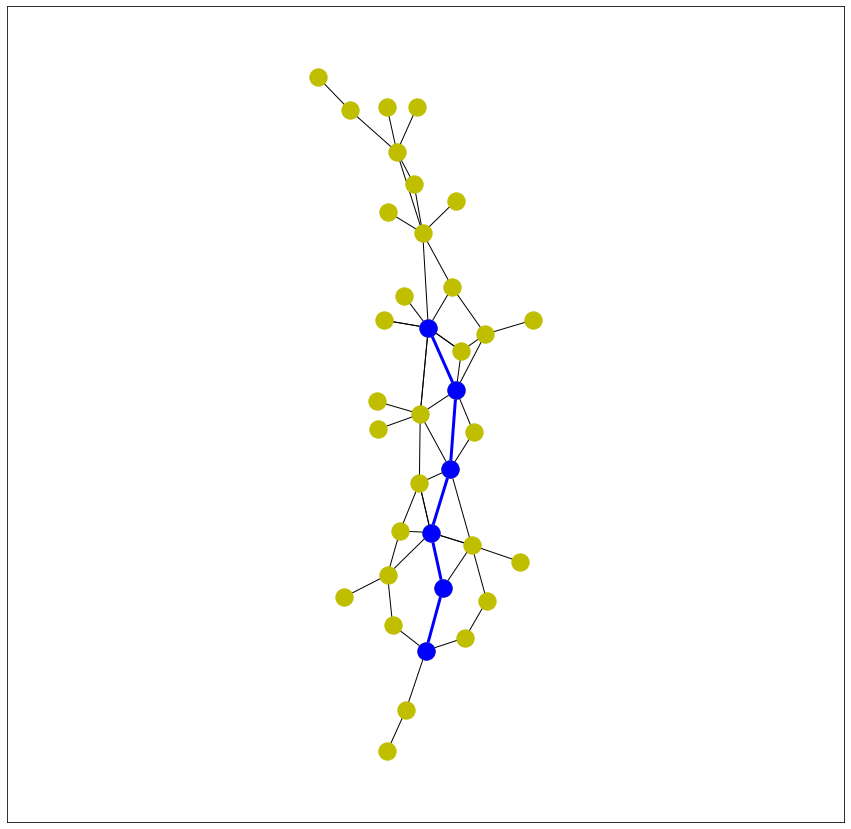

In [ ]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(g,pos,nodelist=current,node_color='y')
nx.draw_networkx_edges(g,pos,edgelist=edgelist)
path_edges2 = list(zip(path2,path2[1:]))
nx.draw_networkx_nodes(g,pos,nodelist=path2,node_color='b')
nx.draw_networkx_edges(g,pos,edgelist=path_edges2,edge_color='b',width=3)
plt.axis('equal')
plt.show()

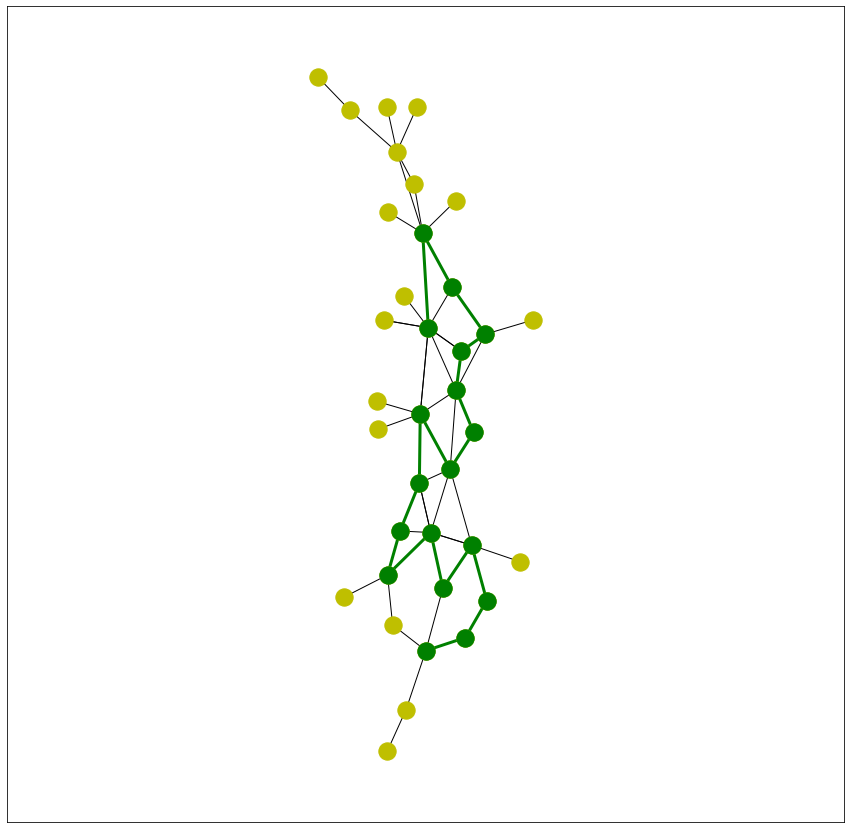

In [ ]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(g,pos,nodelist=current,node_color='y')
nx.draw_networkx_edges(g,pos,edgelist=edgelist)
path_edges3 = list(zip(h_p1,h_p1[1:]))
nx.draw_networkx_nodes(g,pos,nodelist=h_p1,node_color='g')
nx.draw_networkx_edges(g,pos,edgelist=path_edges3,edge_color='g',width=3)
plt.axis('equal')
plt.show()

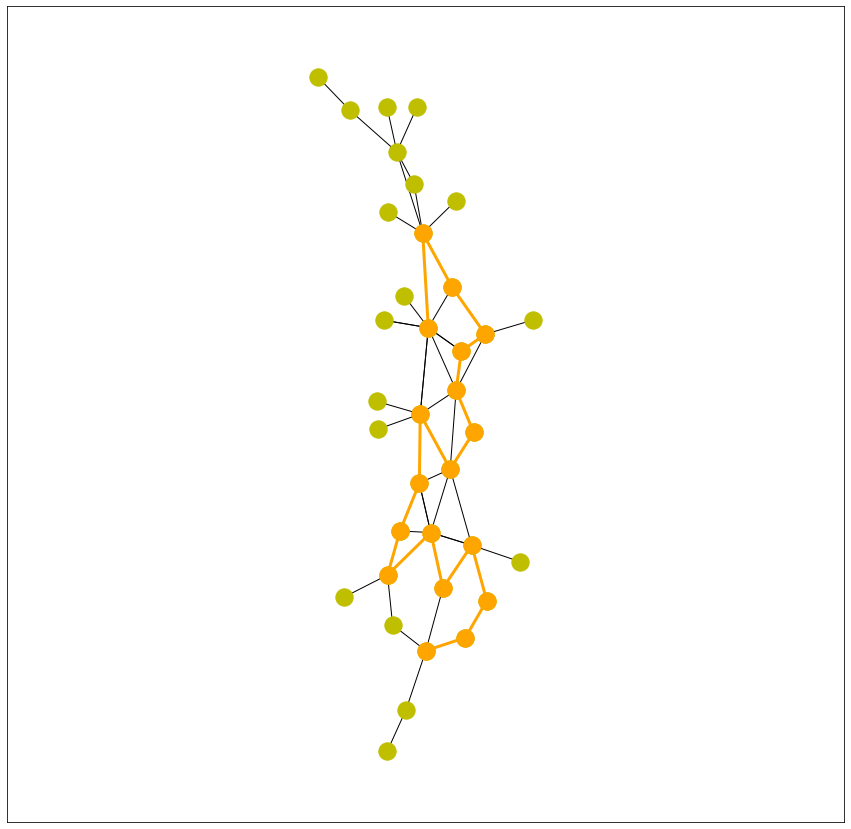

In [ ]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(g,pos,nodelist=current,node_color='y')
nx.draw_networkx_edges(g,pos,edgelist=edgelist)
path_edges4 = list(zip(h_p2,h_p2[1:]))
nx.draw_networkx_nodes(g,pos,nodelist=h_p2,node_color='orange')
nx.draw_networkx_edges(g,pos,edgelist=path_edges3,edge_color='orange',width=3)
plt.axis('equal')
plt.show()

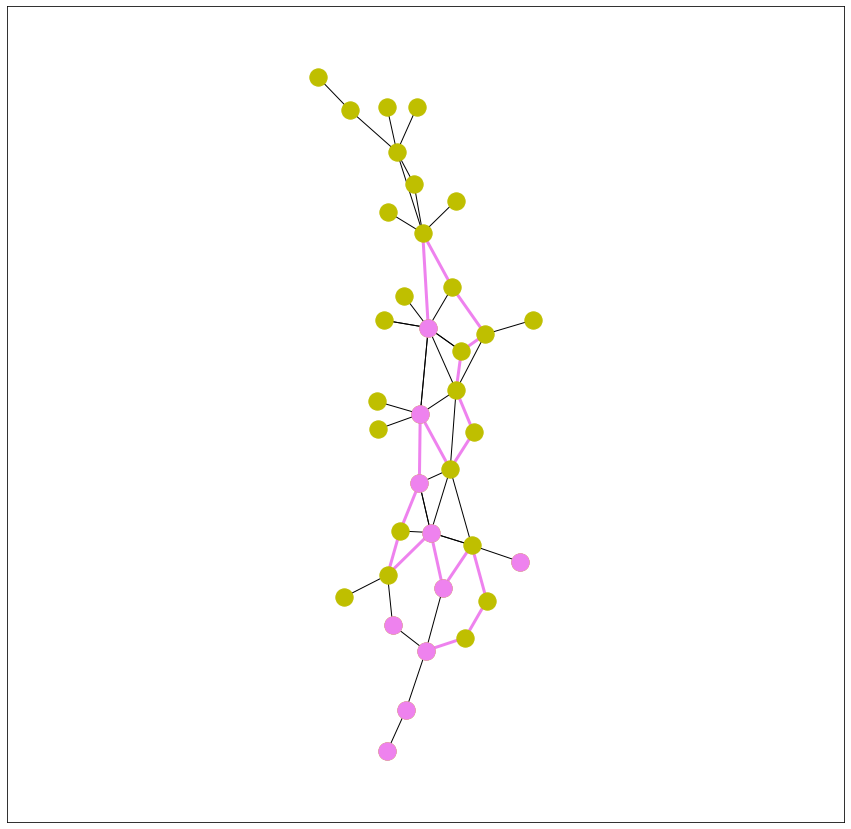

In [ ]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(g,pos,nodelist=current,node_color='y')
nx.draw_networkx_edges(g,pos,edgelist=edgelist)
path_edges4 = list(zip(op,op[1:]))
nx.draw_networkx_nodes(g,pos,nodelist=op,node_color='violet')
nx.draw_networkx_edges(g,pos,edgelist=path_edges3,edge_color='violet',width=3)
plt.axis('equal')
plt.show()

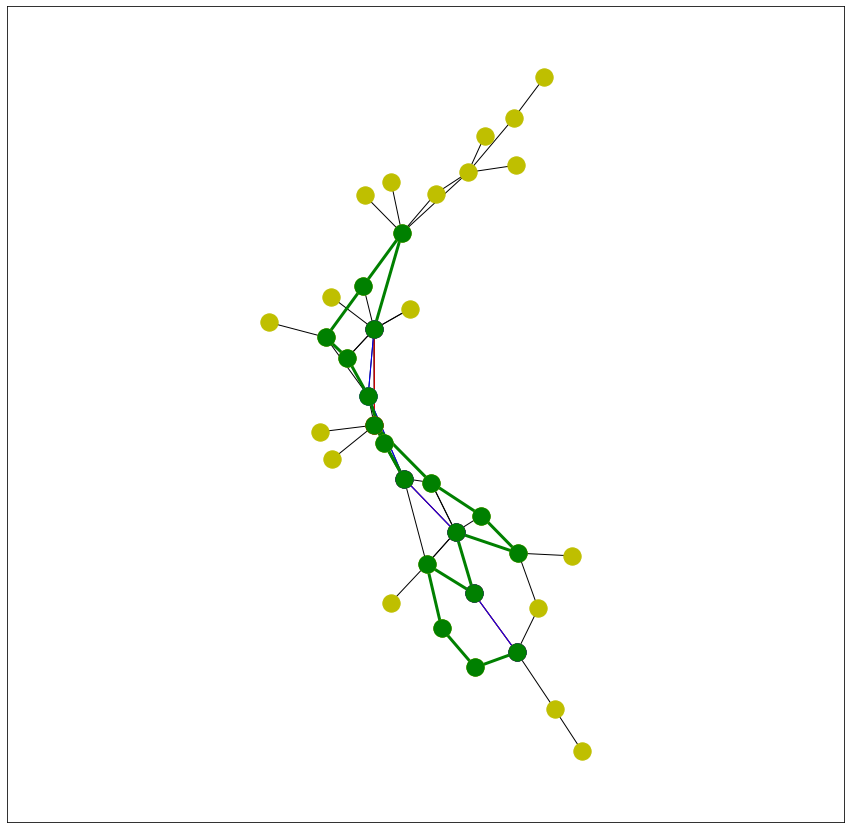

In [ ]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(g,pos,nodelist=current,node_color='y')
nx.draw_networkx_edges(g,pos,edgelist=edgelist)
path_edges1 = list(zip(path1,path1[1:]))
nx.draw_networkx_nodes(g,pos,nodelist=path1,node_color='r')
nx.draw_networkx_edges(g,pos,edgelist=path_edges1,edge_color='r')
path_edges2 = list(zip(path2,path2[1:]))
nx.draw_networkx_nodes(g,pos,nodelist=path2,node_color='b')
nx.draw_networkx_edges(g,pos,edgelist=path_edges2,edge_color='b')
path_edges3 = list(zip(h_p1,h_p1[1:]))
nx.draw_networkx_nodes(g,pos,nodelist=h_p1,node_color='g')
nx.draw_networkx_edges(g,pos,edgelist=path_edges3,edge_color='g',width=3)
plt.axis('equal')
plt.show()

In [ ]:
p1 = dict(nx.all_pairs_bellman_ford_path(g))
#print(p1)
p2 = dict(nx.all_pairs_bellman_ford_path(g,weight='weight'))
#print(p2)
for i in p1:
  for j in p1[i]:
    if p1[i][j]!=p2[i][j]:
      print(p1[i][j],p2[i][j])

In [ ]:
res = []
for i in current:
  for j in current:
    if i!=j:
      s = i
      t = j
      path1 = nx.shortest_path(g,source=s,target=t,weight='weight')
      path2 = nx.shortest_path(g,source=s,target=t)
      h_p,weight = heaviest_path1(g,s,t)
      #print(path1)
      #print(path2)
      w1 = 0
      w2 = 0
      for i in path1:
        w1+=d[i]
      for i in path2:
        w2+=d[i]
      #print("Expected Number of Passengers using minimum of weight as metric = "+str(w1))
      #print("Expected Number of Passengers without weight as metric = "+str(w2))
      #print("Percentage increase = "+str((w1-w2)/w2*100))
      #print(h_p,weight)
      #print("Expected Number of Passengers using maximum of weight as metric = "+str(weight))
      #print("Expected Number of Passengers without weight as metric = "+str(w2))
      #print("Percentage increase = "+str((weight-w2)/weight*100))
      res.append([s,t,path1,w1,path2,w2,h_p,weight])

In [ ]:
result = pd.DataFrame(res,columns=['source','target','shortest_path_using_weight','shortest_path_weight','without_weight_path','weight','maximised_path_using_weight','maximised_path_weight'])
result.to_csv('Weights.csv')

In [ ]:
print(result)

      source  target shortest_path_using_weight  shortest_path_weight  \
0        178     165                 [178, 165]              2.340532   
1        165      21             [165, 178, 21]              3.406105   
2         21      22              [21, 178, 22]              3.250684   
3         22      26              [22, 178, 26]              3.304676   
4         26      89                   [26, 89]              2.194332   
...      ...     ...                        ...                   ...   
1290     189     228            [189, 181, 228]              3.877975   
1291     228      62        [228, 181, 190, 62]              5.059310   
1292      62     188             [62, 190, 188]              3.690592   
1293     188     111       [188, 190, 257, 111]              4.898329   
1294     111     227                 [111, 227]              2.129032   

       without_weight_path    weight  \
0               [178, 165]  2.340532   
1           [165, 178, 21]  3.406105   
2  

In [ ]:
l = (result['maximised_path_weight']-result['weight'])/result['maximised_path_weight']
print("The Mean Improvement in Expected number of passengers is = "+str(l.mean()*100))

The Mean Improvement in Expected number of passengers is = 63.265939510685975


In [ ]:
print(max(current),min(current))

257 21
